<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/2_ML36_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


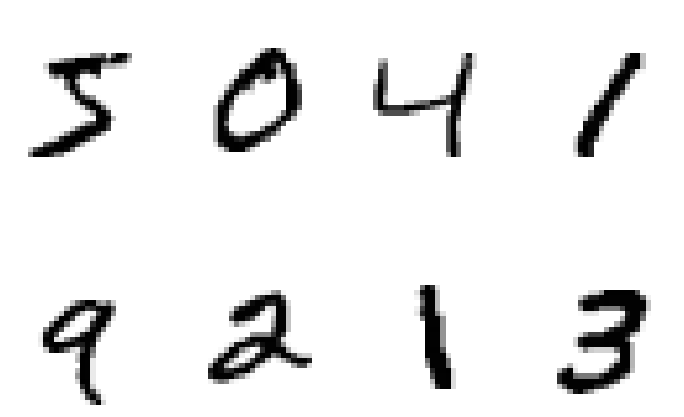

In [3]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

In [4]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(10000, 784)

#Standaryzacja

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

In [18]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                  0.061640    0.061640          1
1                  0.043662    0.105302          2
2                  0.040458    0.145760          3

In [19]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [20]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

pca_1      pca_2     pca_3 class
0 -0.997659  -4.652294 -0.741378   5.0
1  8.682767  -7.124203 -4.195159   0.0
2  2.439019  10.567860 -4.056868   4.0
3 -7.291490  -3.685642  3.065378   1.0
4 -4.791451   4.497604 -5.604281   9.0

In [21]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950, 
           title='PCA - 2 components', template='plotly_dark')


In [11]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', 
              opacity=0.5, width=950, height=700, title='PCA - 3 components', template='plotly_dark')

#t-SNE

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 5.156s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.077499
[t-SNE] KL divergence after 1000 iterations: 1.701281


In [23]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2 class
0    -23.873098  32.841854   5.0
1    -55.769279 -43.384140   0.0
2     32.629089 -60.704330   4.0
3     39.334045  50.083427   1.0
4     66.739891 -32.951347   9.0
...         ...        ...   ...
9995 -24.299442  58.047966   5.0
9996  -9.864473   0.405843   8.0
9997 -63.639572  14.762993   6.0
9998  49.179691 -24.745014   9.0
9999  82.085770  15.353079   7.0

[10000 rows x 3 columns]

In [24]:
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 2 components')

#Porównanie PCA i t-SNE

In [25]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=['PCA', 't-SNE'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()

#PCA - 50 komponentów

In [26]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [27]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 3.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.887781
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.450485
[t-SNE] KL divergence after 1000 iterations: 1.659039


In [28]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

tsne_1     tsne_2 class
0     14.860399  24.500896   5.0
1    -31.085094 -72.439148   0.0
2    -46.537487   3.234517   4.0
3     62.754078  41.520554   1.0
4    -42.145061  40.749371   9.0
...         ...        ...   ...
9995  33.659649  25.440155   5.0
9996  -1.733263   9.122345   8.0
9997  48.818001 -39.407890   6.0
9998 -38.771942  38.667843   9.0
9999  -3.615892  71.122284   7.0

[10000 rows x 3 columns]

In [31]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='t-SNE - 2 komponenty po PCA (50 komponentów)')

In [32]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-SNE', 't-SNE po PCA'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3 = px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
    fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=950, height=450, showlegend=False, template='plotly_dark')
fig.show()

In [33]:
tsne = TSNE(n_components=3, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.887781
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.327301
[t-SNE] KL divergence after 1000 iterations: 1.448441


In [34]:

X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2     tsne_3 class
0     12.857362  -9.229954   1.622963   5.0
1     -3.412876 -19.941500  10.190918   0.0
2    -16.941364  13.916308   3.941491   4.0
3     19.146854   1.387848  -8.956110   1.0
4     -3.069067  17.961485  -1.131299   9.0
...         ...        ...        ...   ...
9995   0.955087  -3.107105  16.278505   5.0
9996  -0.081158   4.190885   2.800008   8.0
9997 -20.366507   1.509258   8.620327   6.0
9998  -1.426565  16.054834   0.254516   9.0
9999  13.464359  16.408508  -3.766454   7.0

[10000 rows x 4 columns]

In [35]:
px.scatter_3d(X_train_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 3 components')

In [36]:
TSNE?